In [1]:
!pip install scikit-fuzzy --upgrade
#!pip install scikit-fuzzy==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=747ad9f159f7169d9bb7130fe0ea73e22755360a46d3f05d8406a3d54942d274
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import skfuzzy

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [3]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [4]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
base['BILL_TOTAL'] = base['BILL_AMT1'] +base['BILL_AMT2'] +base['BILL_AMT3'] +base['BILL_AMT4'] +base['BILL_AMT5'] +base['BILL_AMT6']

In [6]:
base.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [7]:
X = base.iloc[:,[1,25]].values

In [8]:
X.shape

(30000, 2)

In [9]:
r = skfuzzy.cmeans(data = X.T, c = 3, m=2, error=0.005, maxiter=1000, init=None)

In [10]:
r

(array([[ 140102.33006594,   80565.87891163],
        [ 308715.8385397 , 1332275.99961986],
        [ 175796.45364157,  491929.83068538]]),
 array([[0.91996108, 0.9785571 , 0.98001076, ..., 0.9356377 , 0.59885951,
         0.71957534],
        [0.00987785, 0.00245833, 0.00185361, ..., 0.00684954, 0.01926966,
         0.01726445],
        [0.07016108, 0.01898457, 0.01813563, ..., 0.05751276, 0.38187082,
         0.2631602 ]]),
 array([[0.2335016 , 0.35147027, 0.47488002, ..., 0.44241121, 0.16096964,
         0.18118867],
        [0.3031152 , 0.28435709, 0.51431118, ..., 0.30852628, 0.04484636,
         0.40665516],
        [0.4633832 , 0.36417264, 0.01080881, ..., 0.2490625 , 0.794184  ,
         0.41215617]]),
 array([[ 140475.70283077,   66595.3558406 ,   54359.08529245, ...,
          110561.86298739,  195512.34528832,  175245.43117704],
        [1355672.45955675, 1328669.28779017, 1249907.83069053, ...,
         1292196.30323476, 1089932.48699803, 1131379.79912933],
        [ 508671

In [11]:
previsoes_porcentagem = r[1]

In [12]:
previsoes_porcentagem.shape

(3, 30000)

In [13]:
previsoes_porcentagem

array([[0.91996108, 0.9785571 , 0.98001076, ..., 0.9356377 , 0.59885951,
        0.71957534],
       [0.00987785, 0.00245833, 0.00185361, ..., 0.00684954, 0.01926966,
        0.01726445],
       [0.07016108, 0.01898457, 0.01813563, ..., 0.05751276, 0.38187082,
        0.2631602 ]])

In [14]:
previsoes_porcentagem[0][0]

0.919961076597026

In [15]:
previsoes_porcentagem[1][0]

0.009877847868088359

In [16]:
previsoes_porcentagem[2][0]

0.07016107553488576

In [17]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [18]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [19]:
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
previsoes[5000]

0

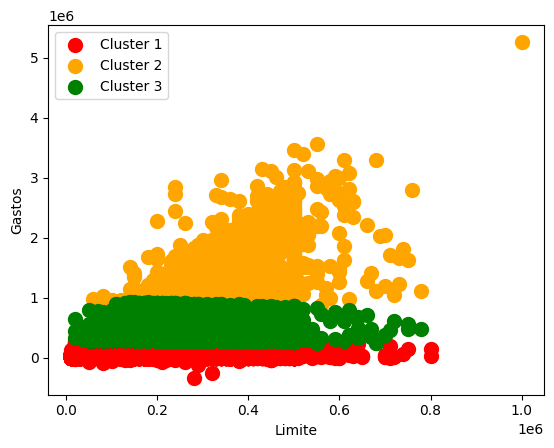

In [21]:
plt.scatter(X[previsoes ==0, 0], X[previsoes ==0, 1], s = 100, c= 'red', label = 'Cluster 1')
plt.scatter(X[previsoes ==1, 0], X[previsoes ==1, 1], s = 100, c= 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes ==2, 0], X[previsoes ==2, 1], s = 100, c= 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();